### Position of a quasar

You measure the position of a quasar $N$ times with the *same* telescope i.e. errors are homoscedastic. Let's say the underlying process is Gaussian, the true position is $\mu = 1$ (in suitable units), and the erorrs are $\sigma=0.2$

### Part 1

- Generate fake measurements. Treat each of these observations as an estimate of the true distribution. So we'll center a Gaussian (with the known $\sigma$) at each point. This is the probability of each data point, $p(x_i|\mu,\sigma)$.
- Plot each of the individual likelihoods separately.  Also plot their product (i.e. the likelihood of the dataset $\{x_i\}$). Make sure the x grid has enough points.
- Just read off the maximum likelihood solution (e.g. using `np.argsort`) 
- Compare it with the MLE estimator derived above

In [28]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

plt.rc('text', usetex=True)  
plt.rc('font', family='serif')

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [72]:
mu = 1
sigma = 0.2
N = 100

data = np.random.normal(mu, sigma, N)
x = np.linspace(0, 2, 10000)

Max Likelihood: 1.0173017301730174
Max Log-Likelihood: 1.0173017301730174
Mean of Data: 1.0172392942683854


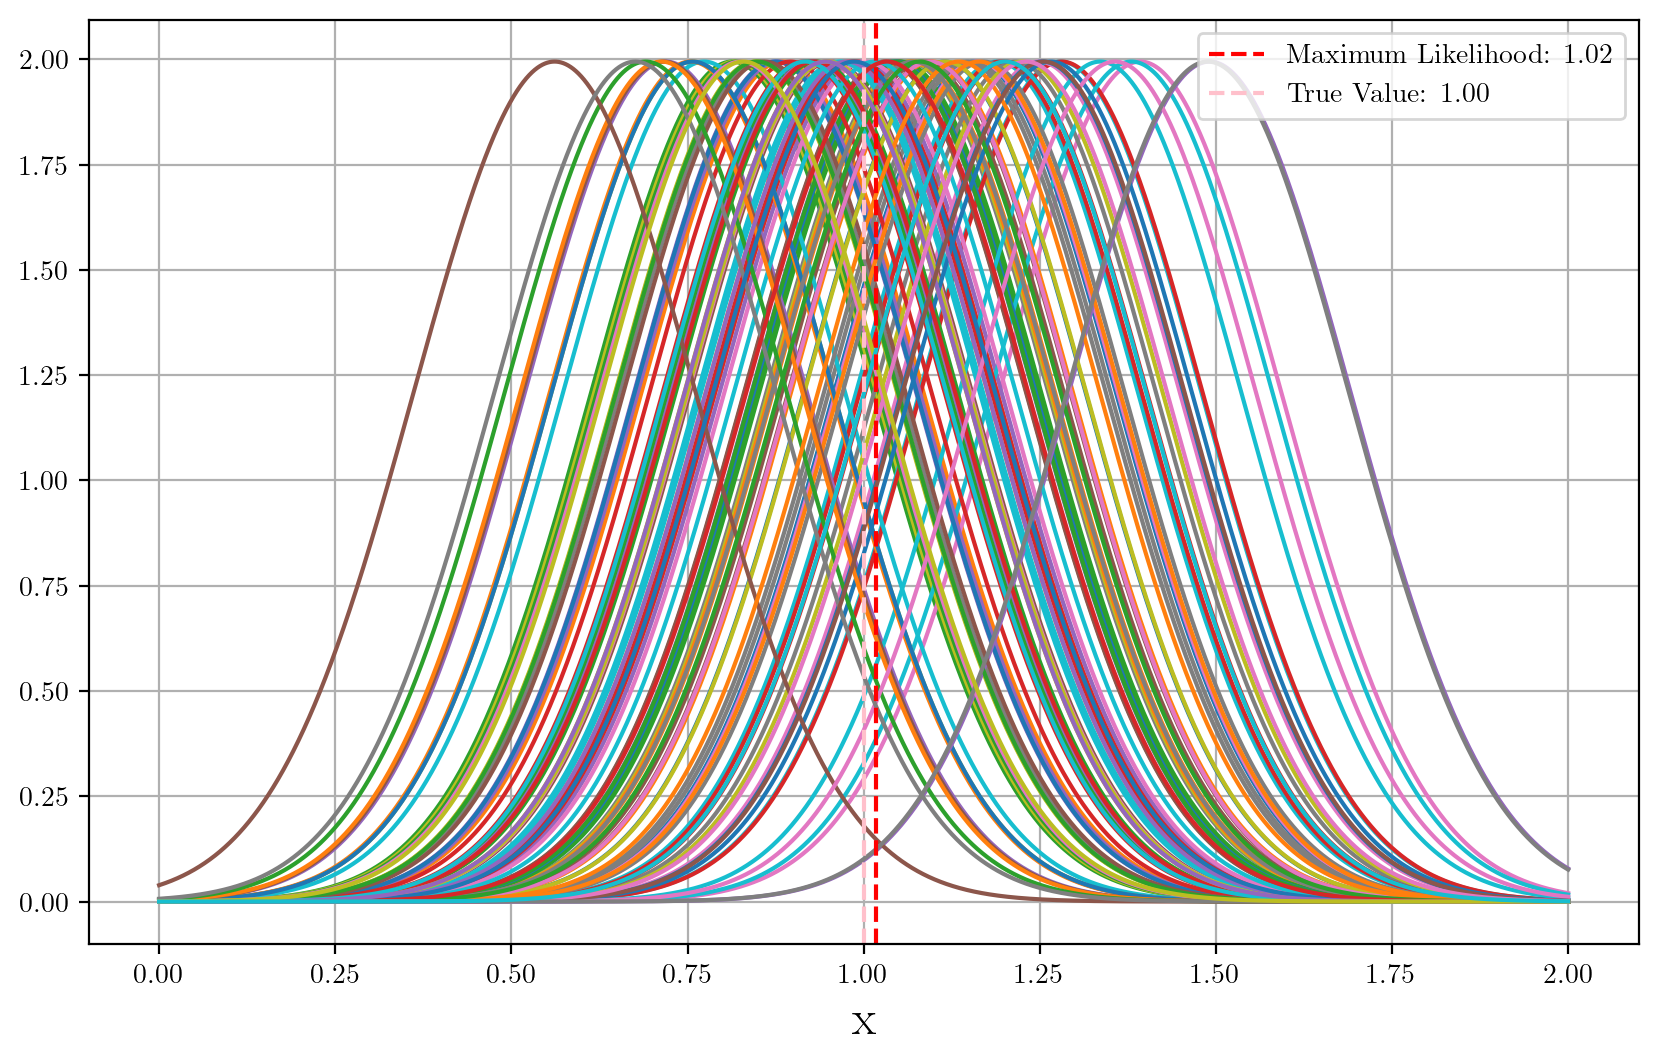

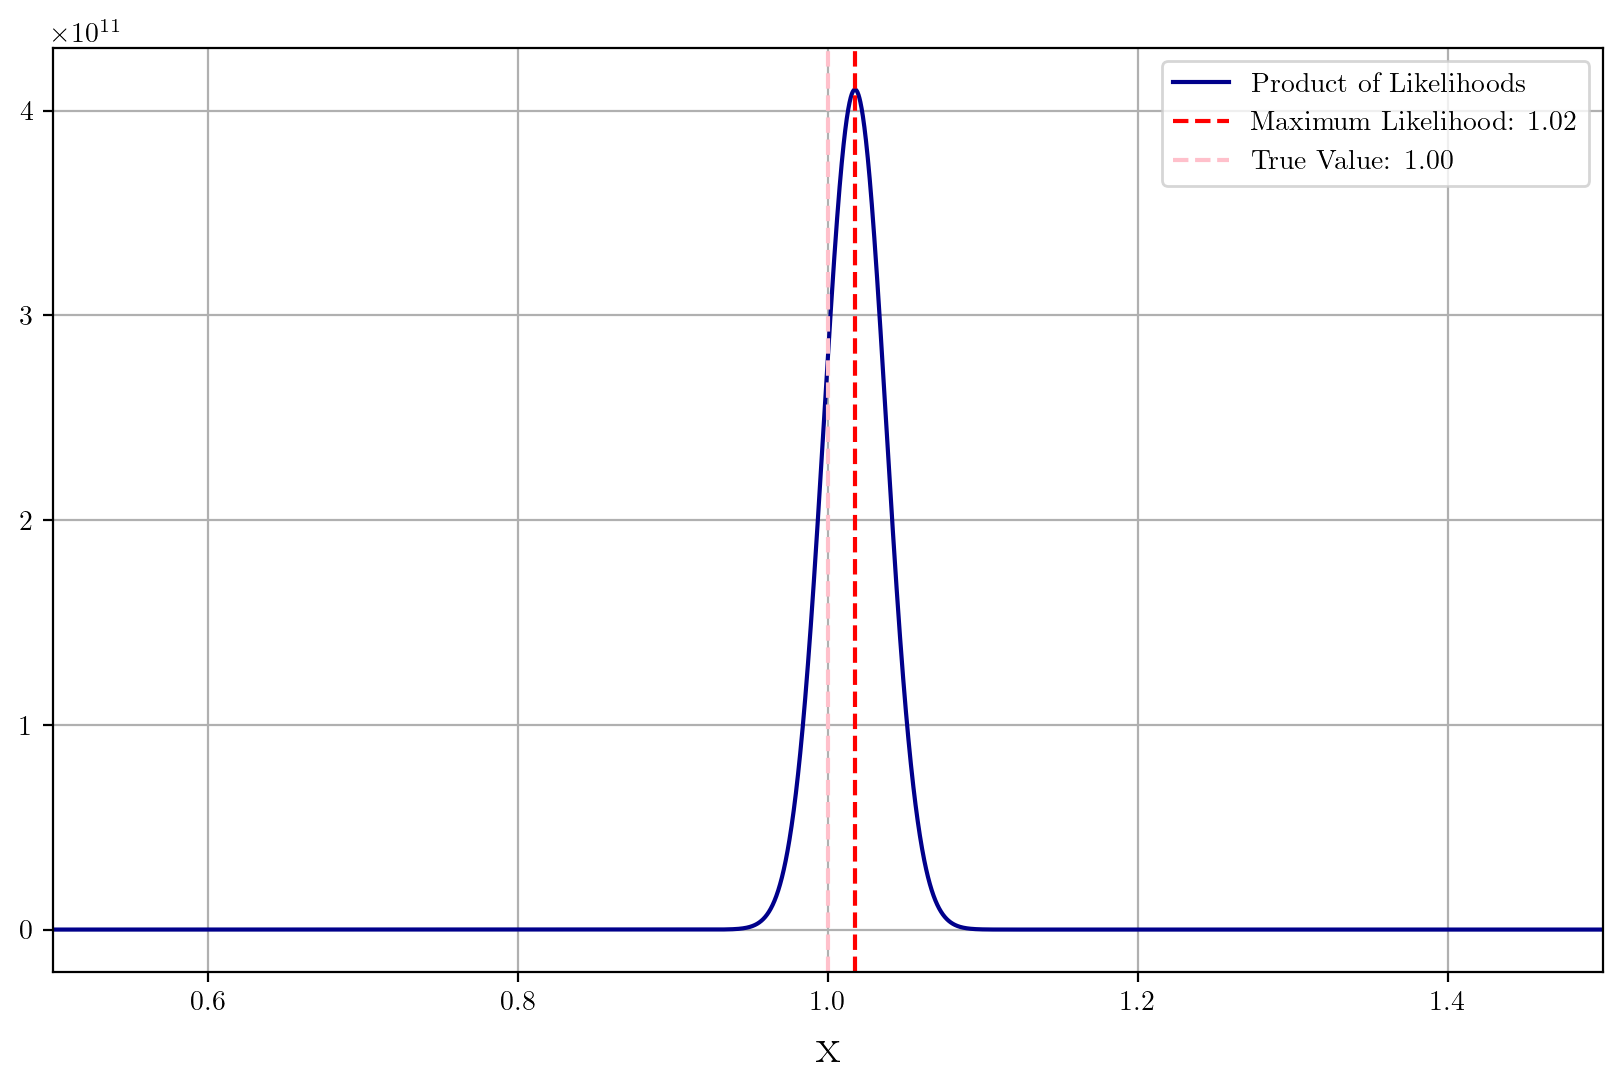

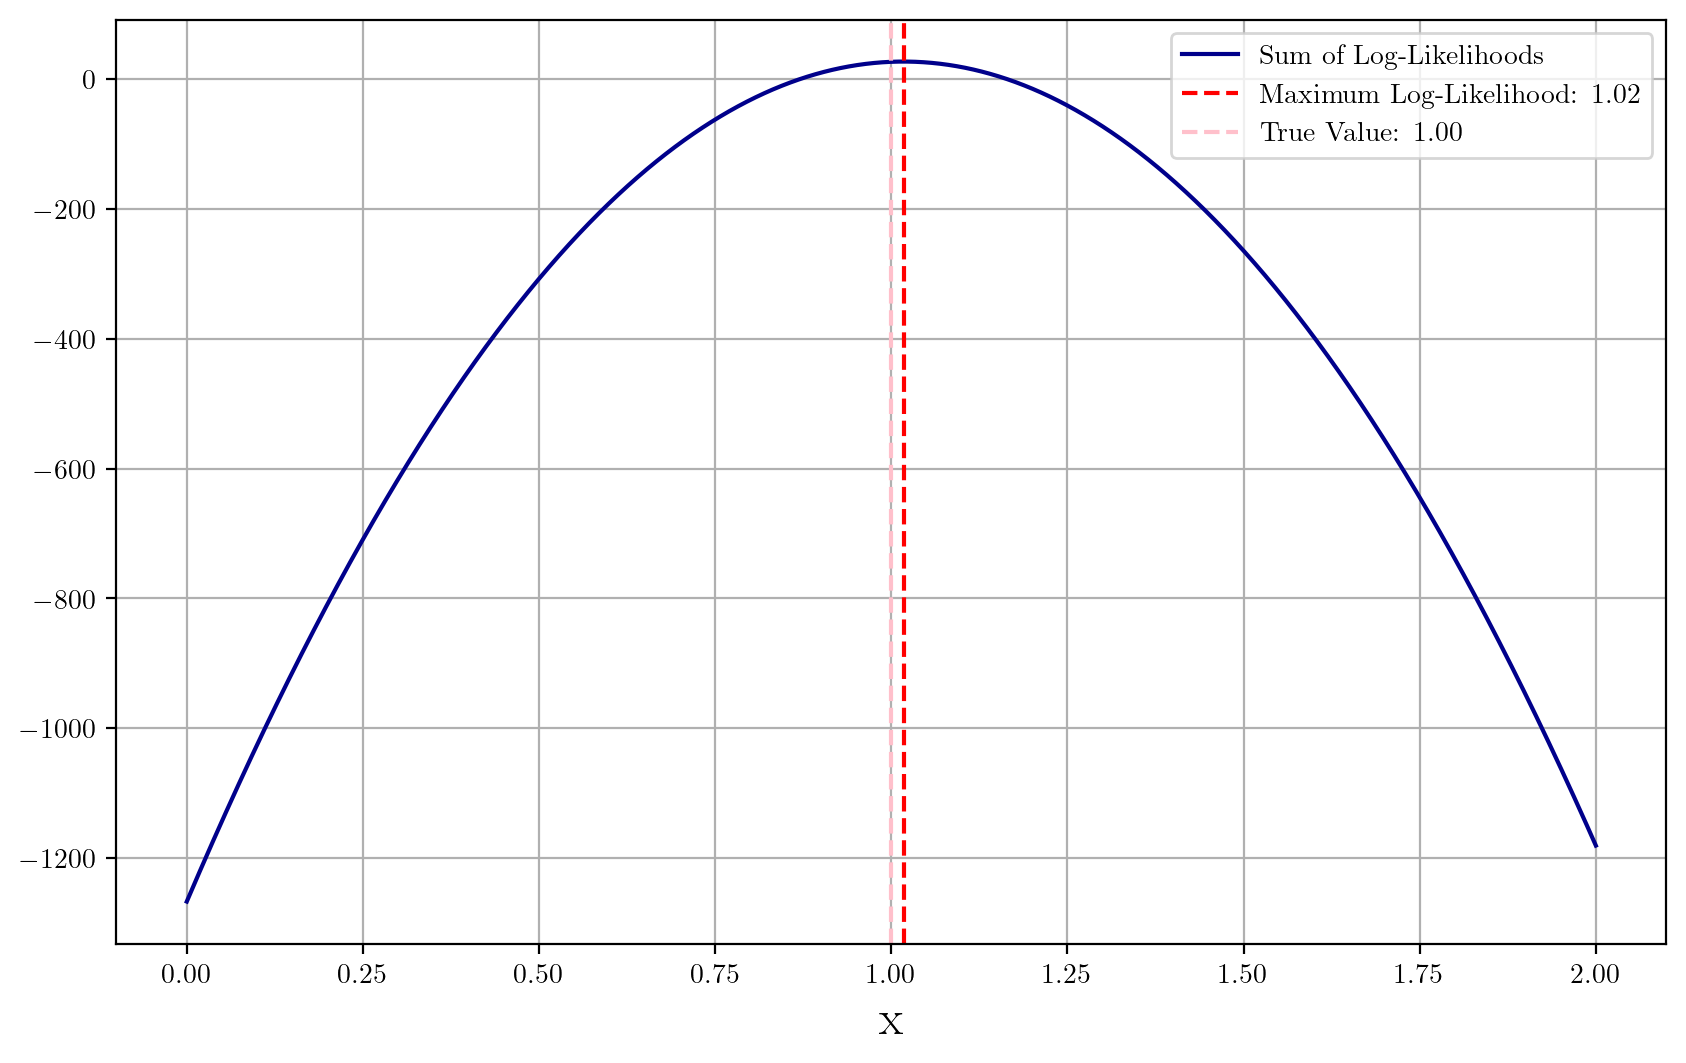

In [73]:
prod = np.ones(len(x))
som_log = np.zeros(len(x))

plt.figure(figsize=(10, 6))

for d in data:
    dist = norm(d, sigma)
    plt.plot(x, dist.pdf(x))
    prod *= dist.pdf(x)
    som_log += np.log(dist.pdf(x))

mean = np.mean(data)
print('Max Likelihood:', x[np.argmax(prod)])
print('Max Log-Likelihood:', x[np.argmax(som_log)])
print('Mean of Data:', mean)

plt.axvline(x[np.argmax(prod)], color='red', linestyle='--', label=f'Maximum Likelihood: {x[np.argmax(prod)]:.2f}')
plt.axvline(mu, color='pink', linestyle='--', label=f'True Value: {mu:.2f}')
plt.xlabel('x',  fontsize=18)
plt.legend(loc='upper right')
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(x, prod, color='darkblue', label='Product of Likelihoods')
plt.axvline(x[np.argmax(prod)], color='red', linestyle='--', label=f'Maximum Likelihood: {x[np.argmax(prod)]:.2f}')
plt.axvline(mu, color='pink', linestyle='--', label=f'True Value: {mu:.2f}')
plt.xlabel('x',  fontsize=18)
plt.xlim(0.5, 1.5)
plt.legend(loc='upper right')
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(x, som_log, label='Sum of Log-Likelihoods', color='darkblue')
plt.axvline(x[np.argmax(som_log)], color='red', linestyle='--', label=f'Maximum Log-Likelihood: {x[np.argmax(som_log)]:.2f}')
plt.axvline(mu, color='pink', linestyle='--', label=f'True Value: {mu:.2f}')
plt.xlabel('x', fontsize=18)
plt.legend(loc='upper right')
plt.grid()
plt.show()


How much do they agree? t-test for now without errors on the max loglikelihood

In [62]:
sigma_mean = sigma/np.sqrt(N)
maxlogL =  x[np.argmax(som_log)]
t = np.abs(mean-maxlogL)/sigma_mean

print(f't = {t}')

t = 0.0038247632171750645


### Part 2

Check the Fisher matrix error estimate makes sense
- do a rough $2^\mathrm{nd}$ order differentation of our log-likelihood function with `np.diff`, 
- divide through by our $\Delta \theta^2$ to get the correct normalization, 
- multiply by $-1$, 
- then take the square root.
- Compare with the Fisher matrix error derived above

In [63]:
F = -np.diff(som_log, n=2) / (x[1] - x[0]) ** 2
sigma_F = np.sqrt(1 / F)

print('Fisher Information Error:', sigma_F[np.argmax(prod)])
print('Error of the Mean:', sigma_mean)

Fisher Information Error: 0.02000000000395599
Error of the Mean: 0.02


- Plot a Gaussian at the measured $\mu$ with this error as the scale to see if it matches the numerical likelihood distribution. (The normalization won't be captured, you can rescale it as you like to check it agrees) 

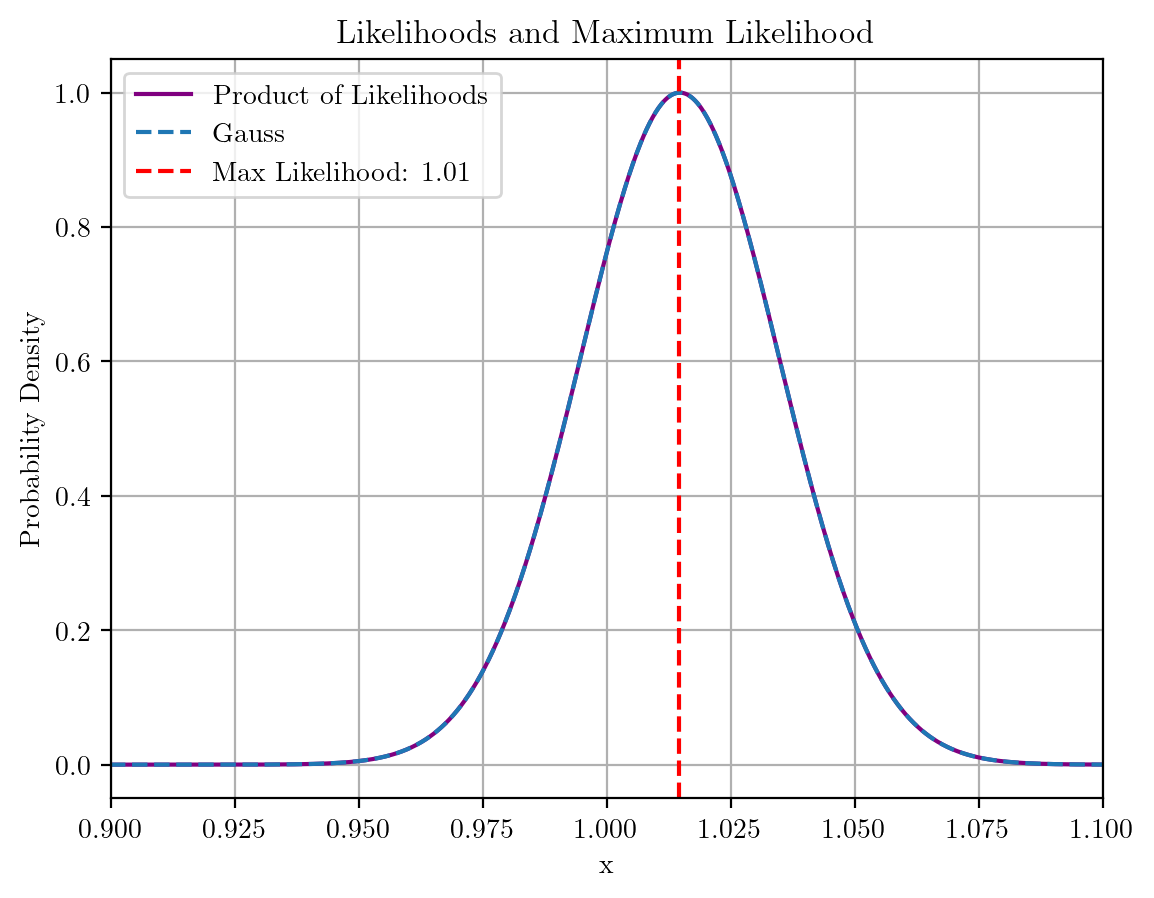

In [64]:
gauss = norm(mean, sigma_mean).pdf(x)

plt.plot(x, prod/np.max(prod), color='purple', label='Product of Likelihoods')
plt.plot(x, gauss/np.max(gauss), label='Gauss centered on the measured $\mu$', linestyle='--') 
plt.axvline(x[np.argmax(prod)], color='red', linestyle='--', label=f'Max Likelihood: {x[np.argmax(prod)]:.2f}')
plt.axvline(mu, color='pink', linestyle='--', label=f'True Value: {mu:.2f}')
plt.title('Likelihoods and Maximum Likelihood')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.xlim(0.9, 1.1)
plt.grid()
plt.show()


### Part 3

Let's make our model more realistic. Our $N$ measurements were taken in different nights, where the sky behaved differently (i.e. errors are heteoscedastic). Let's assume that each measurment has a $\sigma_i$ that is normally distribured with mean $0.2$ and standard deviation $0.05$

- Generalize your code from above to this case

In [74]:
N = 100
mu = 1
mu_err = 0.2
sigma_err = 0.05
x = np.linspace(0, 2, 1000)

sigma = np.abs(np.random.normal(mu_err, sigma_err, N))
data = np.array([np.random.normal(mu, s, 1) for s in sigma])

Max Likelihood: 1.005005005005005
Max Log-Likelihood: 1.005005005005005
Weighted Mean: 1.0055695747550328


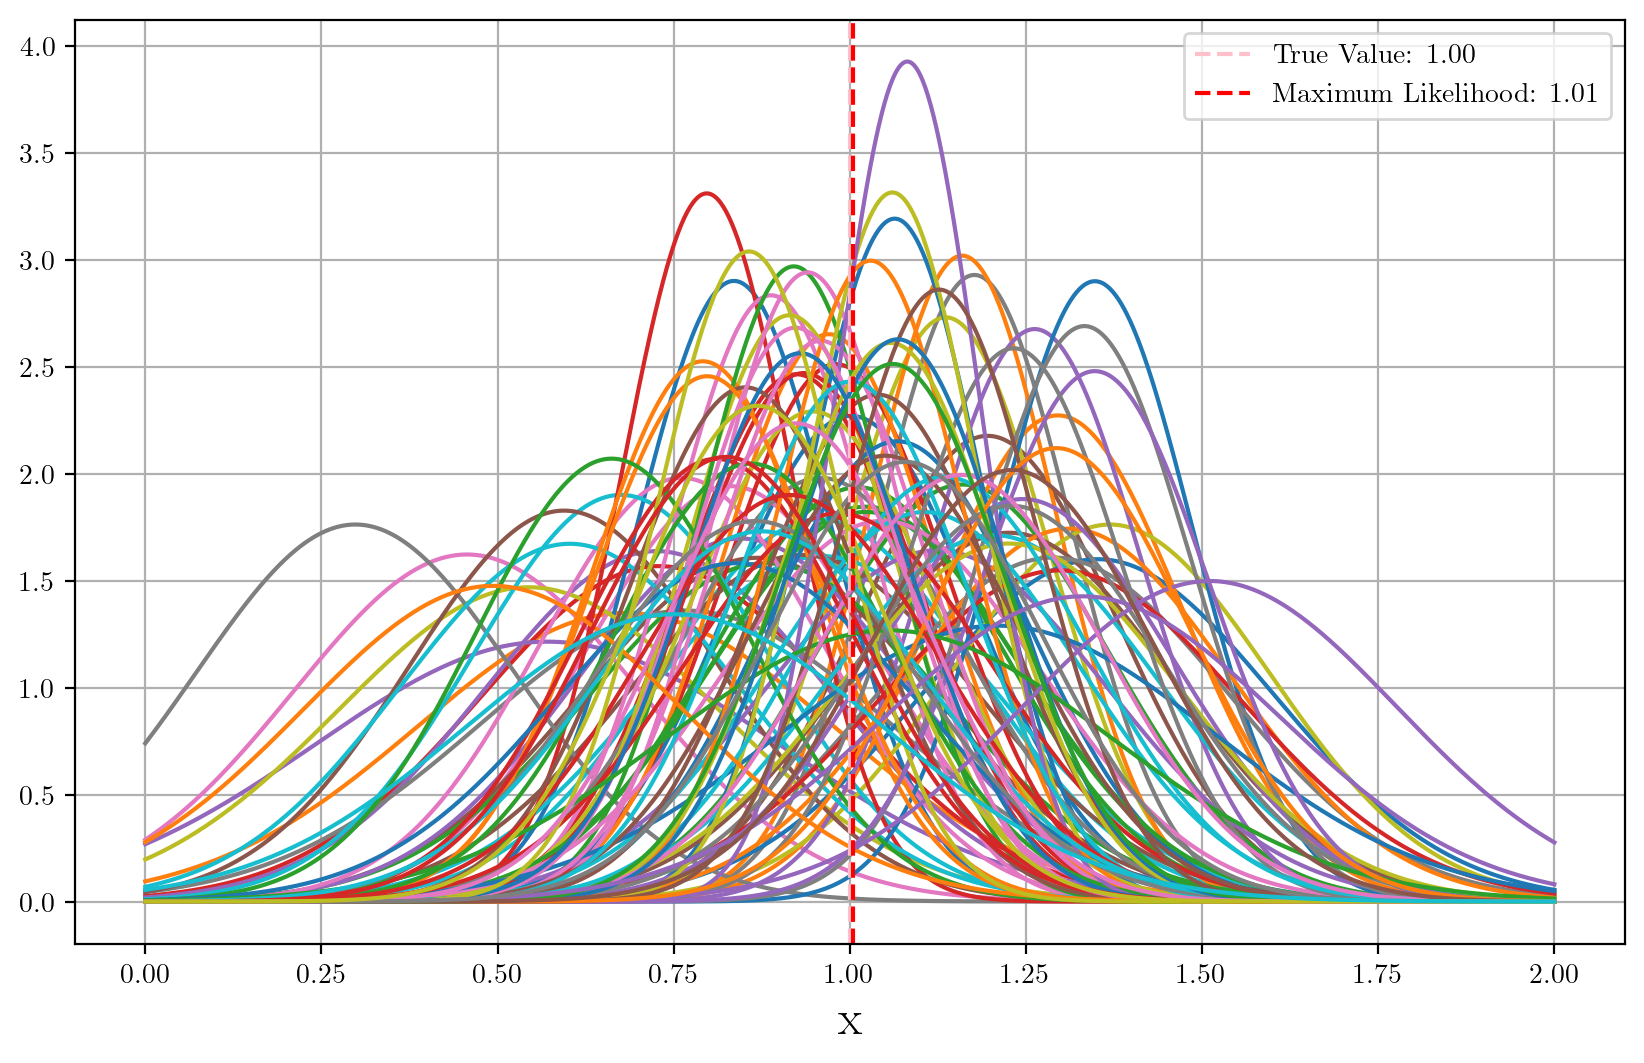

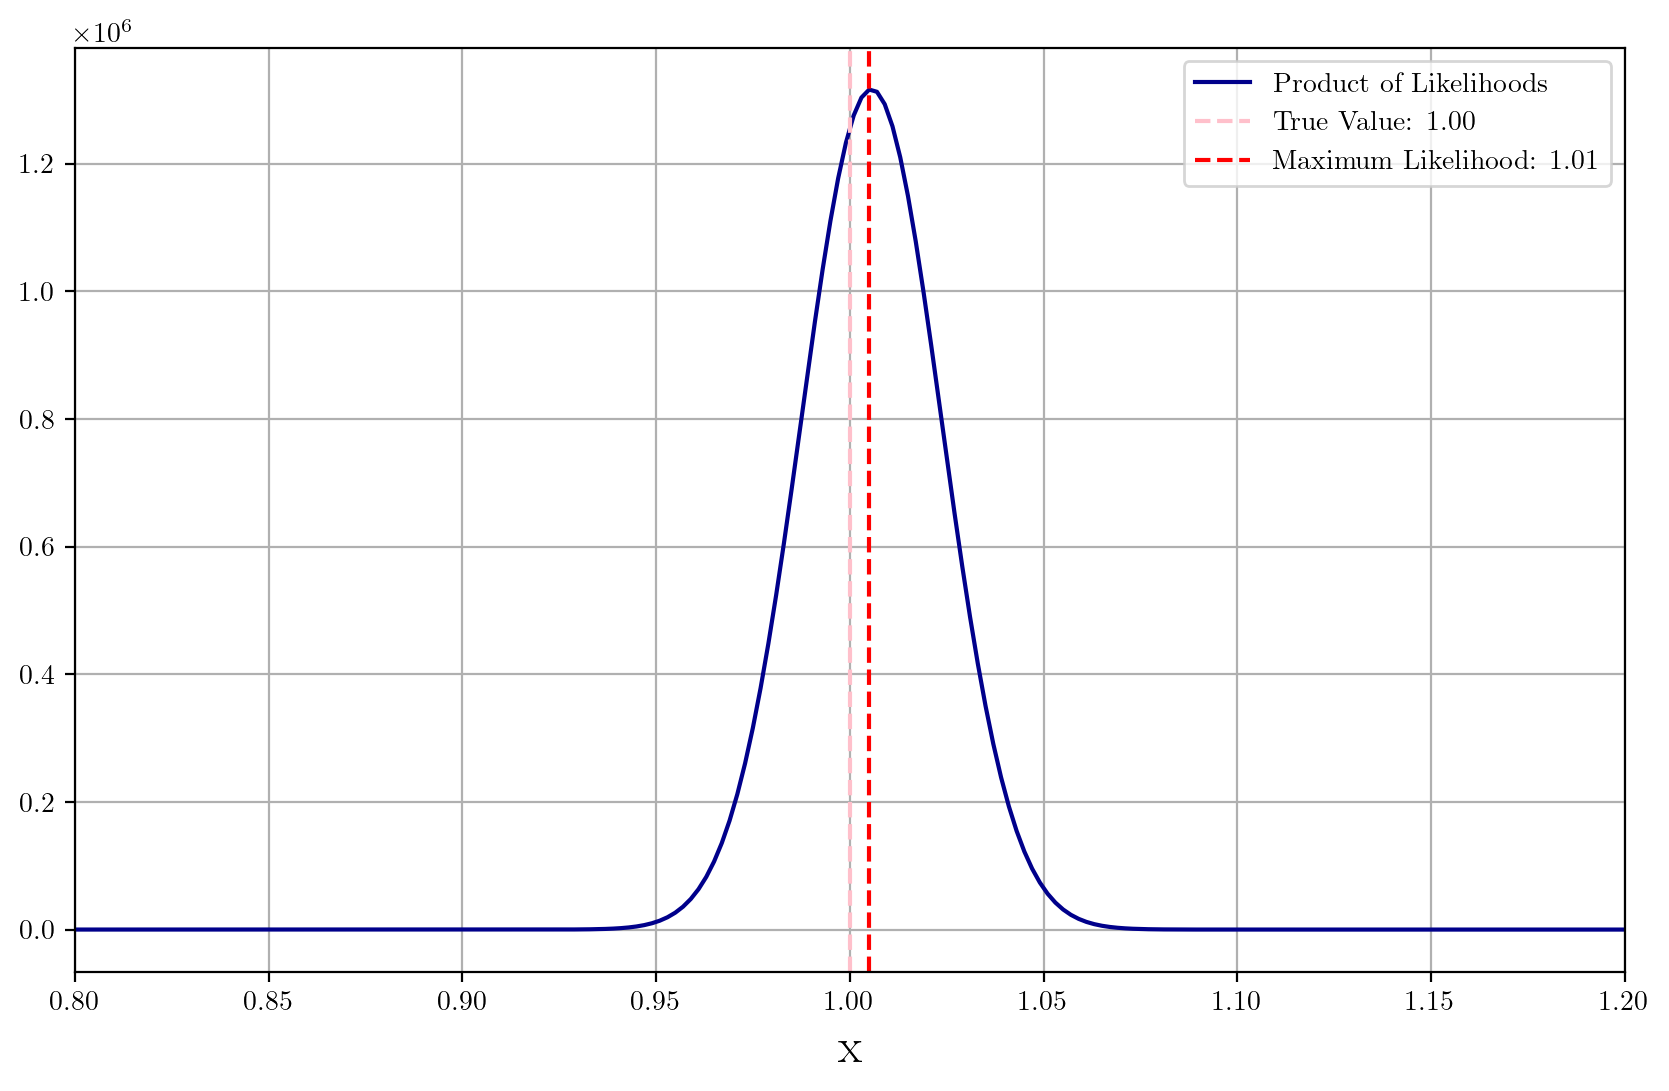

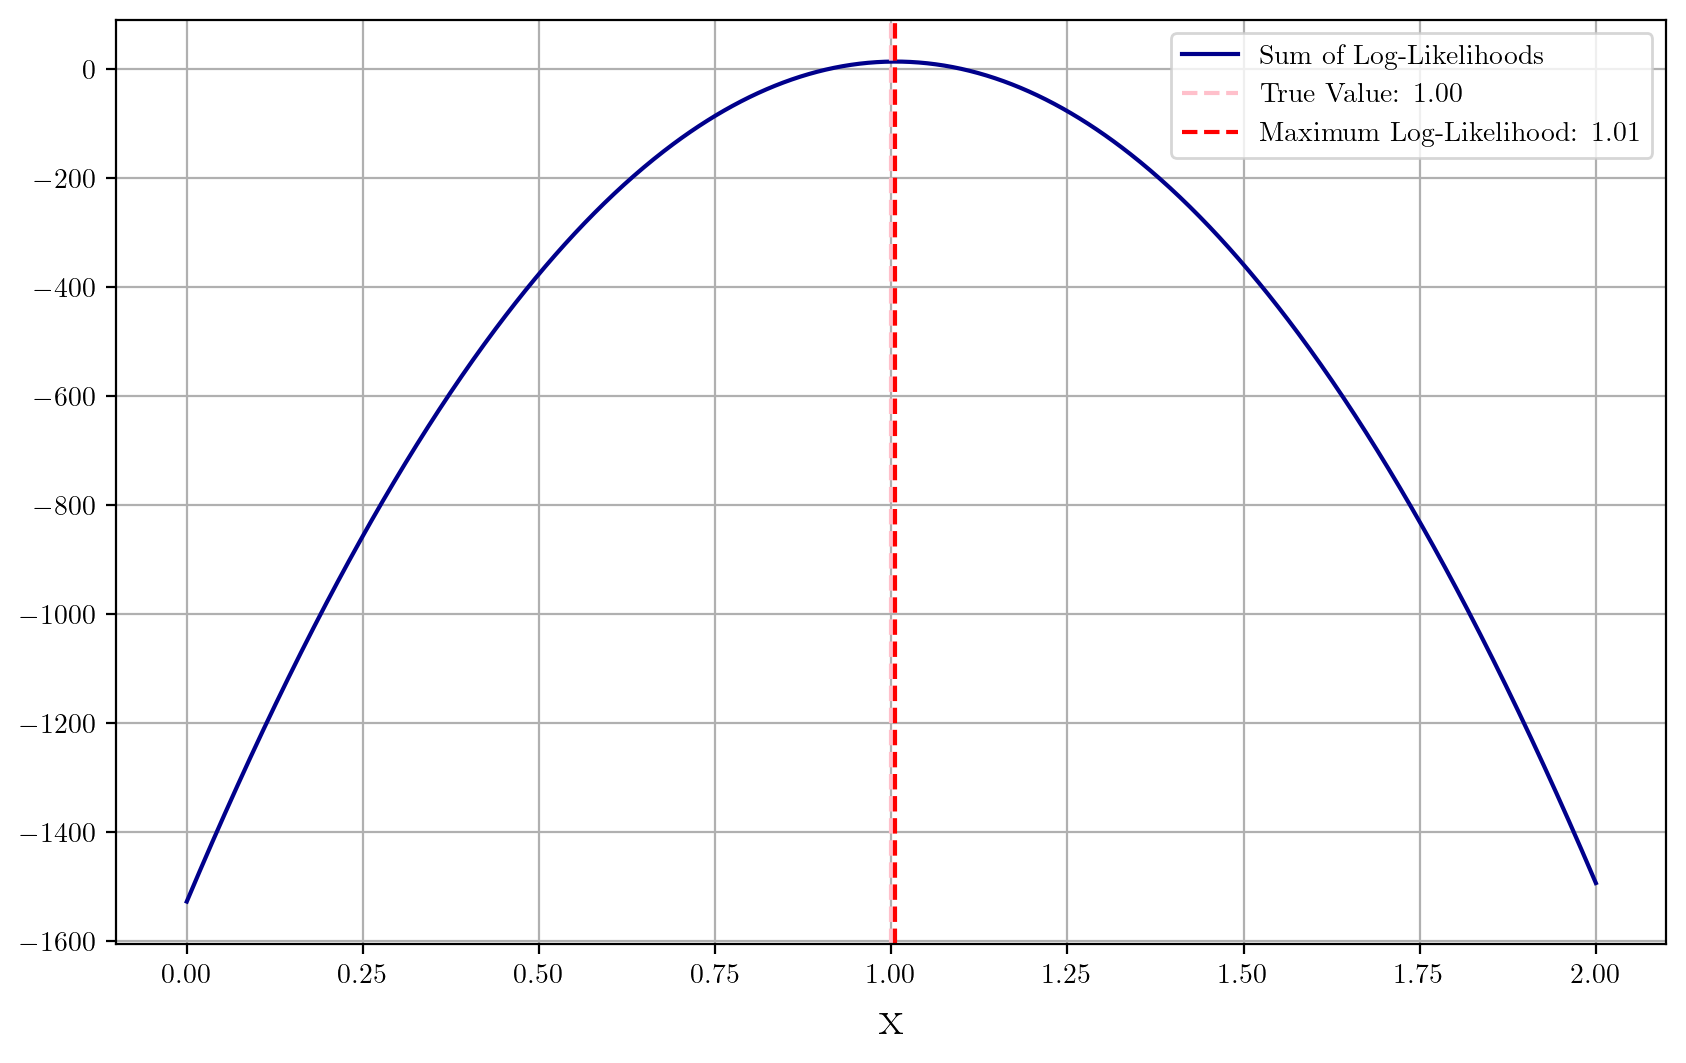

In [75]:
prod = np.ones(len(x))
som_log = np.zeros(len(x))

plt.figure(figsize=(10, 6))

for d, s in zip(data, sigma):
    dist = norm(d, s)
    plt.plot(x, dist.pdf(x))
    prod *= dist.pdf(x)
    som_log += np.log(dist.pdf(x))

mean = np.average(data, weights=1 / sigma ** 2, axis=0)
max_l = x[np.argmax(prod)]
max_ll = x[np.argmax(som_log)]

print('Max Likelihood:', max_l)
print('Max Log-Likelihood:', max_ll)
print('Weighted Mean:', mean[0])

plt.axvline(mu, color='pink', linestyle='--', label=f'True Value: {mu:.2f}')
plt.axvline(x[np.argmax(prod)], color='red', linestyle='--', label=f'Maximum Likelihood: {x[np.argmax(prod)]:.2f}')
plt.xlabel('x',  fontsize=18)
plt.legend(loc='upper right')
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(x, prod, color='darkblue', label='Product of Likelihoods')
plt.axvline(mu, color='pink', linestyle='--', label=f'True Value: {mu:.2f}')
plt.axvline(x[np.argmax(prod)], color='red', linestyle='--', label=f'Maximum Likelihood: {x[np.argmax(prod)]:.2f}')
plt.xlabel('x',  fontsize=18)
plt.xlim(0.8, 1.2)
plt.legend(loc='upper right')
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(x, som_log, label='Sum of Log-Likelihoods', color='darkblue')
plt.axvline(mu, color='pink', linestyle='--', label=f'True Value: {mu:.2f}')
plt.axvline(x[np.argmax(som_log)], color='red', linestyle='--', label=f'Maximum Log-Likelihood: {x[np.argmax(som_log)]:.2f}')
plt.xlabel('x', fontsize=18)
plt.legend(loc='upper right')
plt.grid()
plt.show()


In [76]:
F = -np.diff(som_log, n=2) / (x[1] - x[0]) ** 2
sigma_F = np.sqrt(1 / F)

print('Fisher Error:', sigma_F[np.argmax(prod)])

mean_error = np.sqrt(1 / np.sum(1 / sigma ** 2))
print('Error of the Mean:', mean_error)

Fisher Error: 0.018104546972932515
Error of the Mean: 0.018104546972925916
